# Perform K-means with Scratch and with the library and plot the graphs and print the Initial and Final Centroids. Use random generated datapoints and make_blobs dataset of sklearn.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
a,b=datasets.make_blobs(n_samples=355,centers=None, n_features=2, random_state=0)

In [3]:
data=pd.DataFrame(a,columns=["Group1","Group2"])
data["Target"]=b

In [4]:
data

,Group1,Group2,Target
0,2.329784,0.006749,1
1,-2.465886,3.934903,2
2,-2.435667,2.493565,2
3,2.931100,0.782556,1
4,2.721651,0.436944,1
...,...,...,...
350,1.169320,2.843958,2
351,-0.937024,2.554023,2
352,1.586403,-1.303778,1
353,-0.233353,1.149148,1


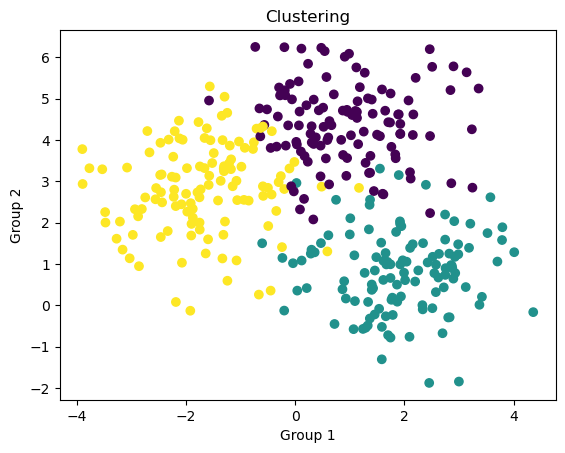

In [5]:
plt.title("Clustering")
plt.scatter(a[:,0],a[:,1],c=b,cmap='viridis', s=36)
plt.xlabel('Group 1')
plt.ylabel('Group 2')
plt.show()

In [6]:
n_cluster=3

In [7]:
from sklearn.metrics import pairwise_distances_argmin,accuracy_score,silhouette_score,confusion_matrix,classification_report
from sklearn.cluster import KMeans

In [8]:
def kmean(n_cluster,a,b,df):
    df1=data.copy()
    rng=np.random.RandomState(6)
    i=rng.permutation(a.shape[0])[:n_cluster]
    centroid=a[i]
    labels=pairwise_distances_argmin(a,centroid)
    print("Initial Cluster : \n",centroid)
    plt.title("Initial Centoids")
    plt.scatter(a[:,0],a[:,1],c=b,cmap='viridis', s=80)
    plt.scatter(centroid[:,0], centroid[:,1], s=50, marker="*", c="red", label='Cluster Centers')
    plt.xlabel('Group 1')
    plt.ylabel('Group 2')
    plt.legend()
    plt.text(centroid[0][0]-2,centroid[0][1]+0.5, centroid[0], fontsize=9, color='red')
    plt.text(centroid[1][0]-2,centroid[1][1]+0.5, centroid[1], fontsize=9, color='yellow')
    plt.text(centroid[2][0]-2,centroid[2][1]+0.5, centroid[2], fontsize=9, color='red')
    plt.show()
    j=1
    while True:
        labels=pairwise_distances_argmin(a,centroid)
        new_center=np.array([a[labels==i].mean(0) for i in range(n_cluster)])
        print("Updated Center : "+str(j),new_center)
        if np.all(centroid==new_center):
            break
        centroid=new_center
        df1["labels"+str(j)]=labels
        plt.title("Updated Centroids : "+str(j))
        plt.scatter(a[:,0],a[:,1],c=labels,cmap='viridis', s=50)
        plt.scatter(centroid[:,0], centroid[:,1], s=50, marker="*", c="red", label='Cluster Centers')
        labels=pairwise_distances_argmin(a,centroid)
        plt.xlabel('Group 1')
        plt.ylabel('Group 2')
        plt.legend()
        plt.text(centroid[0][0]-2,centroid[0][1]+0.5, centroid[0], fontsize=9, color='black')
        plt.text(centroid[1][0]-2,centroid[1][1]+0.5, centroid[1], fontsize=9, color='black')
        plt.text(centroid[2][0]-2,centroid[2][1]+0.5, centroid[2], fontsize=9, color='red')
        plt.show()
        j=j+1
    return df1 

Initial Cluster : 
 [[0.60708824 4.06440815]
 [1.616078   1.07900209]
 [0.4334086  4.71983737]]


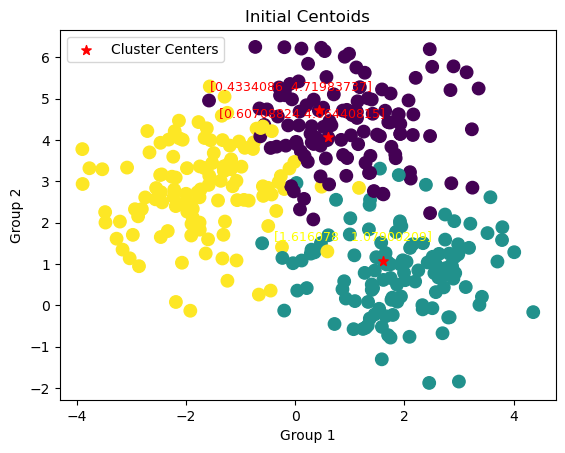

Updated Center : 1 [[-5.27349208e-01  3.19303887e+00]
 [ 1.56707277e+00  8.53130154e-01]
 [-1.29604496e-03  4.89005228e+00]]


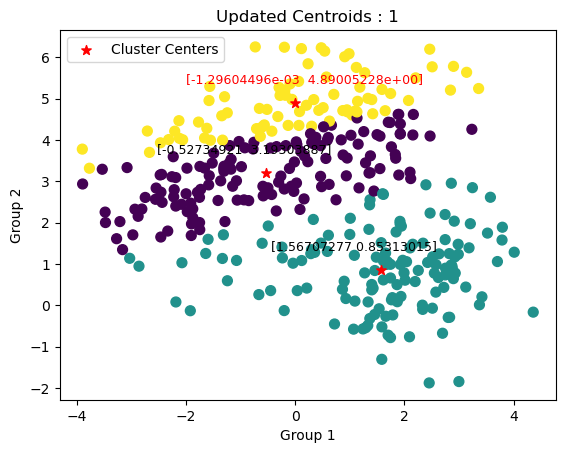

Updated Center : 2 [[-1.35205214  2.83776072]
 [ 1.93550655  0.88686372]
 [ 0.80001329  4.77094995]]


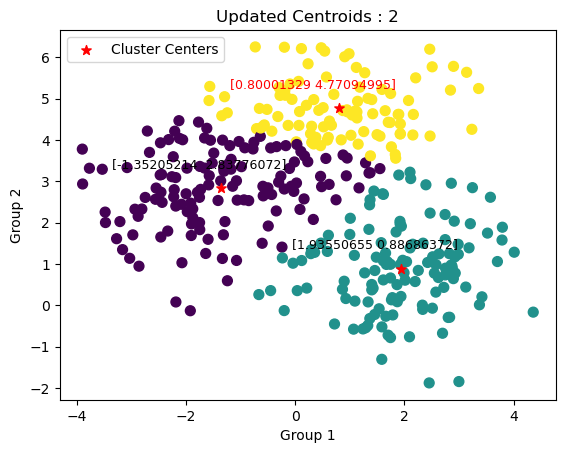

Updated Center : 3 [[-1.62182396  2.7886657 ]
 [ 1.96254994  0.84756317]
 [ 0.89384512  4.53830293]]


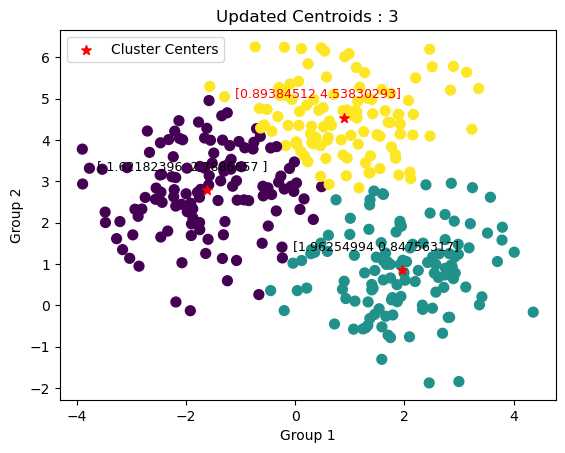

Updated Center : 4 [[-1.73095401  2.78502963]
 [ 1.94170424  0.82292937]
 [ 0.8508268   4.4499538 ]]


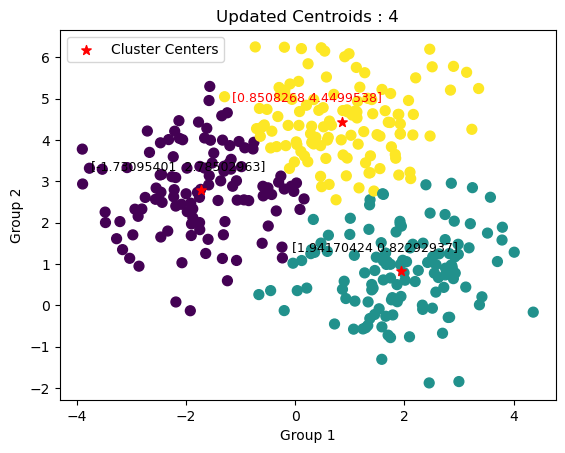

Updated Center : 5 [[-1.75999989  2.79805422]
 [ 1.92654016  0.81009811]
 [ 0.85020739  4.42342903]]


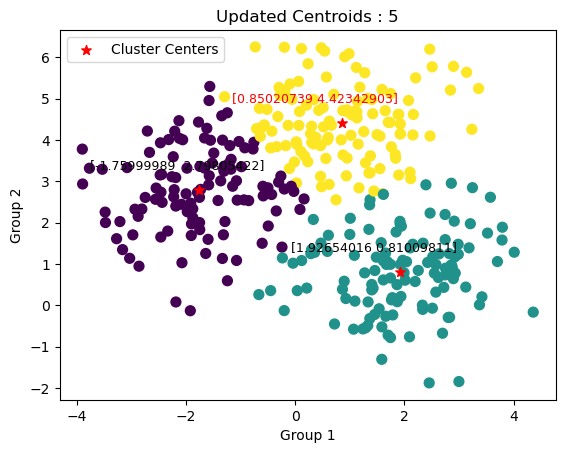

Updated Center : 6 [[-1.75999989  2.79805422]
 [ 1.92521669  0.77660784]
 [ 0.8688377   4.39728936]]


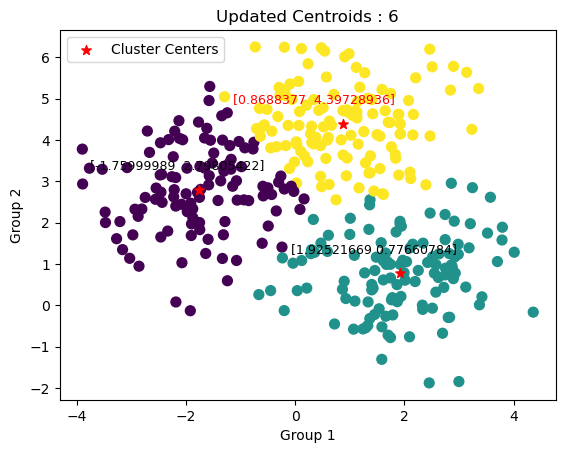

Updated Center : 7 [[-1.75999989  2.79805422]
 [ 1.92521669  0.77660784]
 [ 0.8688377   4.39728936]]


,Group1,Group2,Target,labels1,labels2,labels3,labels4,labels5,labels6
0,2.329784,0.006749,1,1,1,1,1,1,1
1,-2.465886,3.934903,2,2,0,0,0,0,0
2,-2.435667,2.493565,2,0,0,0,0,0,0
3,2.931100,0.782556,1,1,1,1,1,1,1
4,2.721651,0.436944,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
350,1.169320,2.843958,2,0,0,2,2,2,2
351,-0.937024,2.554023,2,0,0,0,0,0,0
352,1.586403,-1.303778,1,1,1,1,1,1,1
353,-0.233353,1.149148,1,1,1,0,0,1,1


In [9]:
kmean(3,a,b,data)

In [10]:
ok=KMeans(n_clusters=3,random_state=20)
ok.fit(data)
ypred=ok.predict(data)
accuracy=silhouette_score(data,ypred)
print(accuracy)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.5227510150790016


In [11]:
#kmeans centroids
kmean=ok.cluster_centers_
print(kmean)

[[ 0.90742248  4.38444029  0.03333333]
 [-1.72106198  2.84455816  1.99137931]
 [ 1.93671567  0.79798913  1.        ]]


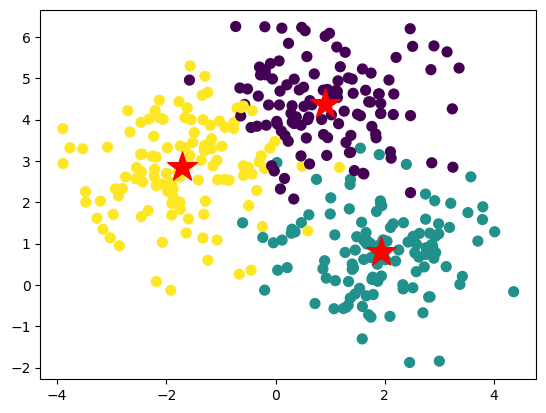

In [12]:
plt.scatter(a[:,0],a[:,1],c=b,cmap='viridis', s=50)
plt.scatter(kmean[:,0], kmean[:,1], s=500, marker="*", c="red", label='Cluster Centers')